# **THE SPARKS FOUNDATION - GRIP January 2022**

## **Data Science & Business Analytics**

---
## **Name: Vaibhav Kapse**
## **Task 6: Prediction Using Decision Tree Algorithm**
#### Create a decision tree classifier and visualize it graphically
#### Dataset is available at: https://bit.ly/3kXTdox

In [1]:
# Importing the required libraries
import pandas as pd # Importing the pandas library
import numpy as np # Importing the numpy library
import seaborn as sb # Importing the seaborn library
import matplotlib.pyplot as plt # Importing the matplotlib library
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing the train_test_split function
from sklearn import metrics #Importing the scikit learn metrics module
from vega_datasets import data

In [2]:
# Reading the dataset from the csv file.
df = data.iris()

In [3]:
# Displaying the dataset
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Seeing the data types of the entries in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### As seen from the above table, except for the column named "Species" which consists of object entries, rest of the columns have entries having data type has float.

In [5]:
# Displaying the summary of the data set.
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the above table we can find out the values like the count mean, standard deviation , minimum and maximum values and so on for each of the columns.


In [6]:
# Checking for missing values
df.isna().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

As seen from above, there are no missing values in our dataset. Nor do we have any garbage values. Hence no data cleaning is required.


#### Visualizing the dataset.
Seeing the frequency of each species having various values for each of the attributes- Sepal Length, Sepal Width, Petal Length and Petal width.

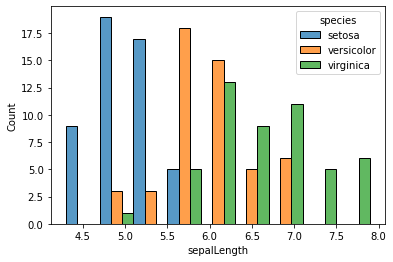

In [7]:
sb.histplot(data=df, x="sepalLength", hue="species", multiple="dodge")

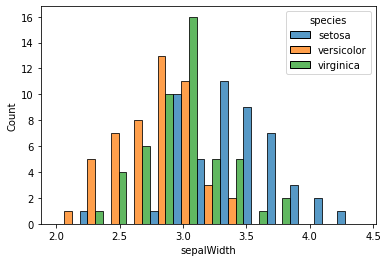

In [8]:
sb.histplot(data=df, x="sepalWidth", hue="species", multiple="dodge")

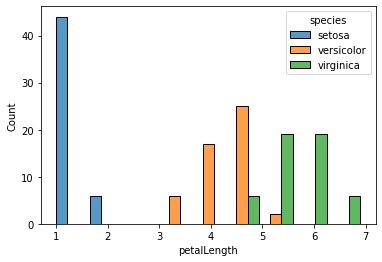

In [9]:
sb.histplot(data=df, x="petalLength", hue="species", multiple="dodge")

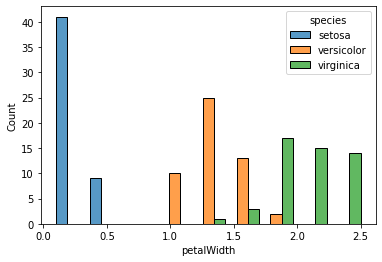

In [10]:
sb.histplot(data=df, x="petalWidth", hue="species", multiple="dodge")

#### Now we will get the target values and feature values.


In [11]:
feature_cols = ['sepalLength','sepalWidth','petalLength','petalWidth']
X = df[feature_cols]
X

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y = df.species
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Further, we will split the dataset into the training and test dataset.


In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

#### Descision Tree classifier 


In [14]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

#### Fitting the model to our train dataset.


In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predicting the values for the test dataset.


In [16]:
y_pred = model.predict(X_test)

#### Calculating the Accuracy of our trained model.


In [17]:
print("Accuracy(%):",metrics.accuracy_score(y_test,y_pred)*100,"%")

Accuracy(%): 94.73684210526315 %


#### Visualizing the Descision Tree Classifier


In [18]:
# Importing the necessary libraries for the graph.
from io import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus


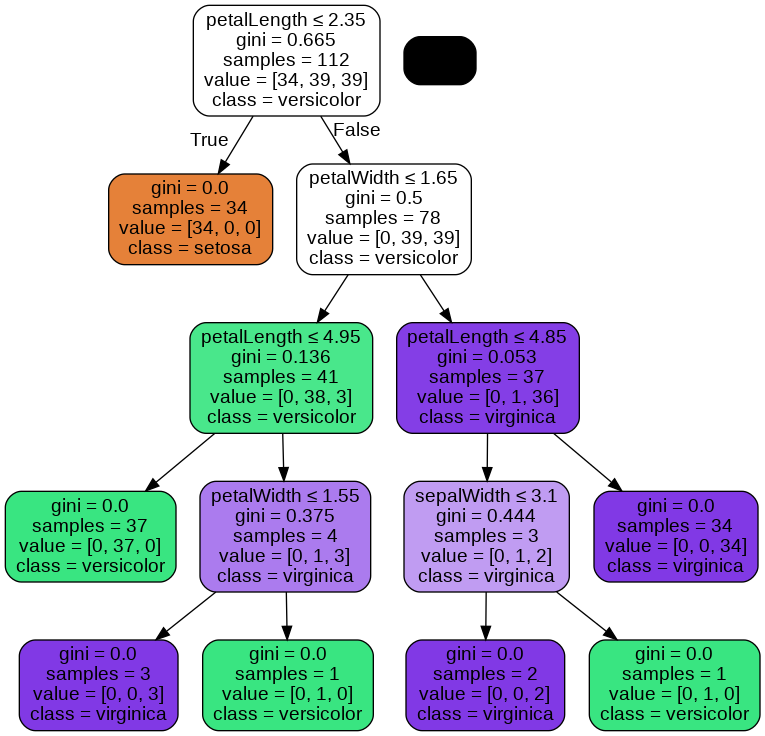

In [19]:
# Plotting the descision tree.
dot_data = StringIO()
class_name = ['setosa','versicolor','virginica']
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True, 
                feature_names = feature_cols ,class_names=class_name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())